# Pré-Processamento De Dados

Neste arquivo será realizado o pré-processamento de dados, bem como filtros temperais, espaciais e visualizações de dados em gráficos

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import signal
import mne


# definições de filtros

def butter_bandpass(data, lowcut, highcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)


def butter_lowpass(data, lowcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)


def butter_highpass(data, highcut, fs=200, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)


def butter_notch(data, cutoff, var=1, fs=200, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

# Visualização de gráficos com e sem filtros

Explicação...

In [10]:
def print_graphs(data):
    for i in range(data.shape[1]):
        plt.plot(data[:, i])
    plt.title('Domínio do tempo')
    plt.show()

    for i in range(data.shape[1]):
        plt.psd(data[:, i], Fs=200)
    plt.title('Domínio da frequência')
    plt.show()

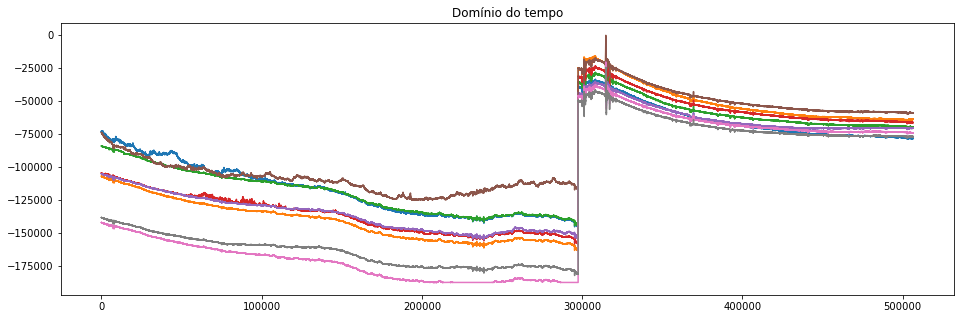

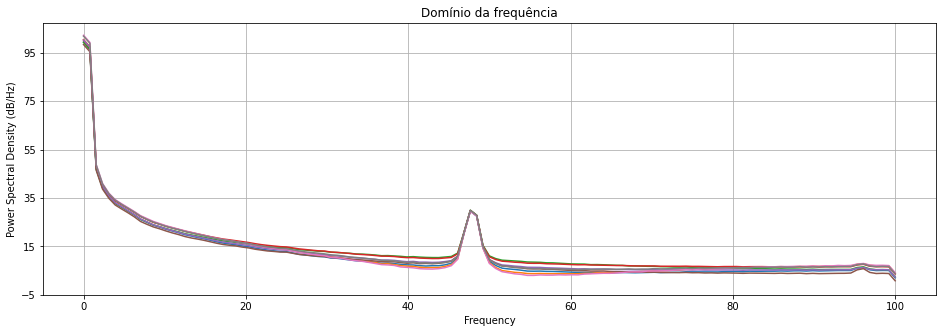

In [11]:
#apresentação dos dados sem aplicação dos filtros

data = np.load('../dataset/s5/data.npy')  #carrega os dados do arquivo data.npy
rcParams['figure.figsize'] = [16.,5.]

print_graphs(data)

# Aplicação do filtro notch
Removendo principalmente dados de interferencia da rede eletrica

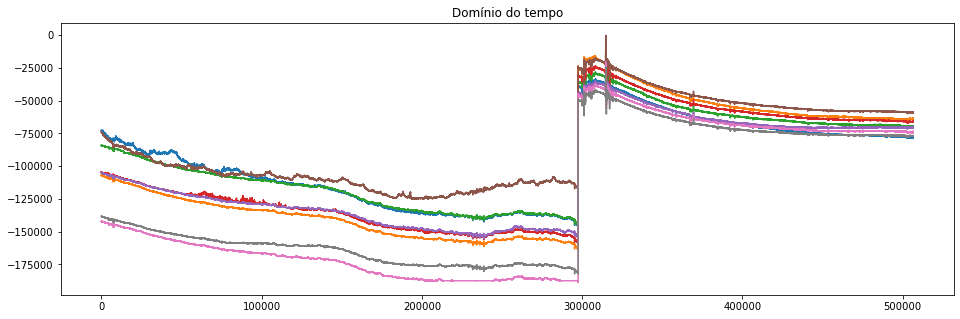

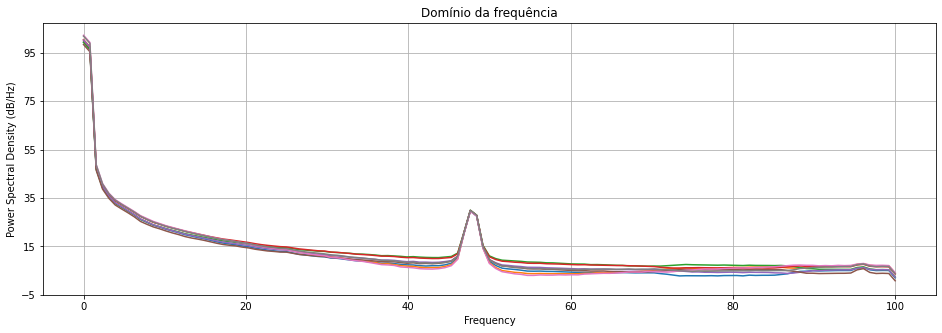

In [12]:
data_filtered = butter_notch(data.flatten(), 60)
data_filtered = data_filtered.reshape(int(data_filtered.shape[0] / 8), 8)
print_graphs(data_filtered)

In [19]:
# Defina o número de amostras
n_samples = len(data)

# Defina o número de canais
n_channels = data.shape[1]

# Calcule o número de amostras que são divisíveis uniformemente pelo número de canais
n_samples_trimmed = (n_samples // n_channels) * n_channels
print("Número de amostras após o corte:", n_samples_trimmed)

# Corte o array de dados para ter um comprimento que seja divisível uniformemente pelo número de canais
data = data[:n_samples_trimmed]

# Reorganize o array de dados para corresponder ao número de canais especificado no objeto 'info'
data = data.reshape((-1, n_channels))

# Crie nomes e tipos de canal
ch_names = [f'EEG {i+1}' for i in range(n_channels)]
ch_types = ['eeg'] * n_channels
sfreq = 250

# Crie um objeto Info
info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)

# Crie um objeto MNE RawArray
mne_data = mne.io.RawArray(data.T, info)

# Imprima a forma do array de dados e o objeto Info criado
print("Forma dos dados após o corte e remodelação:", data.shape)
print("Objeto Info:", info)



Número de amostras após o corte: 506504
Creating RawArray with float64 data, n_channels=8, n_times=506504
    Range : 0 ... 506503 =      0.000 ...  2026.012 secs
Ready.
Forma dos dados após o corte e remodelação: (506504, 8)
Objeto Info: <Info | 7 non-empty values
 bads: []
 ch_names: EEG 1, EEG 2, EEG 3, EEG 4, EEG 5, EEG 6, EEG 7, EEG 8
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>


Effective window size : 8.192 (s)


/tmp/ipykernel_9593/1001922053.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd.plot()
/home/alunos/a2222736/.local/lib/python3.10/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


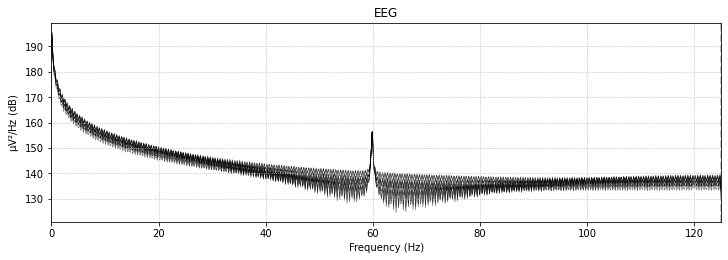

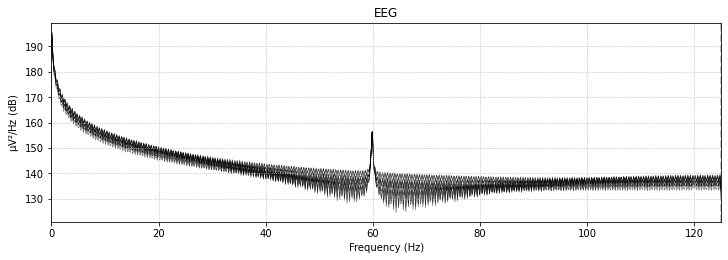

In [20]:
# Assuming mne_data is your MNE RawArray object
psd = mne_data.compute_psd()

# Plot the PSD with a sprecific color
psd.plot()

In [ ]:
mne_data_filtered = mne_data.copy()
mne_data_filtered = mne_data_filtered.notch_filter(freqs=60)
mne_data_filtered = mne_data_filtered.filter(l_freq=0, h_freq=124)
mne_Data_filtred.compute_psd().plot()